<center><img src="https://raw.githubusercontent.com/Mihir-Ai-lab/The_Data_Science_Guy/main/Images/Notebook%20Header.png" width="1200" height="627" /></center>

---
# **Table of Contents**
---

1. [**Introduction**](#Section1)<br>
2. [**Problem Statement**](#Section2)<br>
    2.1 [**Project Details**](#Section21)<br>
3. [**Installing & Importing Libraries**](#Section3)<br>
    3.1 [**Installing Libraries**](#Section31)<br>
    3.2 [**Upgrading Libraries**](#Section32)<br>
    3.3 [**Importing Libraries**](#Section33)<br>
4. [**Data Acquisition & Description**](#Section4)<br>
    4.1 [**Data Description**](#Section41)<br>
    4.2 [**Data Information**](#Section42)<br>
5. [**Data Pre-Profiling**](#Section5)<br>
6. [**Data Pre-Processing**](#Section6)<br>
    6.1 [**Handling Redundant Data & Outliers**](#Section61)<br>
7. [**Data Post-Profiling**](#Section7)<br>
8. [**Exploratory Data Analysis**](#Section8)<br>
    8.1 [**How many requests tend to get Approved vs Rejected?**](#Section81)<br>
    8.2 [**Which Resource tends to get Accepted or Rejected more?**](#Section82)<br>
    8.3 [**Under what Managers, do the resources tend to get Approved/Rejected more?**](#Section83)<br>
    8.4 [**How does the Company role group ID 2 affect the Approval/Rejection?**](#Section84)<br>
    8.5 [**How does the Department affect Approval/Rejection of resources?**](#Section85)<br>
    8.6 [**Effect of Extended Company role Extended Description to the Approval Status?**](#Section86)<br>
    8.7 [**Effect of Extended Company role Description to the Approval Status?**](#Section87)<br>
    8.8 [**How does the role Title affect the Approval or rejection of resources in General?**](#Section88)<br>
9. [**Feature Selection and PCA**](#Section9)<br>
    9.1 [**Feature Selection with Correlation Matrix**](#Section91)<br>
    9.2 [**Encoding Categorical Variables**](#Section92)<br>
    9.3 [**Balancing Dataset with SMOTE**](#Section93)<br>
    9.4 [**Feature Scaling**](#Section94)<br>
10. [**Model Development & Evaluation**](#Section10)<br>
    10.1 [**Initializing & Running Classifiers**](#Section101)<br>
11. [**Submission**](#Section11)<br>

---
<a name = Section1></a>
# **1. Introduction**
---

**Company Introduction - E-Corp**

Our client for this project is a multinational technology company.

- ECorp is an American multinational technology company that focuses on e-commerce, cloud computing, digital streaming, and artificial intelligence.
- They are spread across the globe with hundreds of thousands of employees in these domains.
- When an employee at any company starts working, they first need to obtain the resource access necessary to fulfill their role.
- Employees passing certain criteria regarding their primary and secondary roles are granted access to the requested resources.
- This efficient system has helped the company maintain background checks of its employees and usage of allocated resources.

**Current Scenario**

A group of employees has been invited to test the automated system. An auto-access model seeks to minimize the human involvement required to grant or revoke employee access.

---
<a name = Section2></a>
# **2. Problem Statement**
---

The current process suffers from the following problems:

- If an employee discovers that they need access to certain resources, they are supposed to contact a knowledgeable supervisor.
- The supervisor takes time to manually grant the needed access to the requesting employee.
- As employees move throughout a company, this access discovery/recovery cycle wastes a non-trivial amount of time and money.
- They want to automate the process of approving or revoking access to a resource according to their role in the company.

<p align="center"><img src="https://raw.githubusercontent.com/Mihir-Ai-lab/Academic-Projects/main/Images/Access%20Control.gif"></p>

<a name = Section21></a>
### **2.1 Project Details**

- Our Role: To build a binary-class classification model using the dataset.
- Project Deliverables: Employee Access Classification.
- Machine Learning Task: Classification
- Target Variable: ACTION
- Win Condition: N/A (best possible model)
- Evaluation Metric: The model evaluation will be based on the Accuracy Score.

---
<a id = Section3></a>
# **3. Installing & Importing Libraries**

<a name = Section31></a>
### **3.1 Installing Libraries**

In [61]:
!pip install -q datascience                                         # Package that is required by pandas profiling
!pip install -q pandas-profiling                                    # Library to generate basic statistics about data
!pip install -q scikit-learn
!pip install -q matplotlib seaborn
!pip install -q category_encoders
!pip install -q imbalanced-learn

<a name = Section31></a>
### **3.2 Upgrading Libraries**

In [62]:
!pip install -q --upgrade pandas-profiling
!pip install -q --upgrade scikit-learn

In [63]:
# Runtime Restart Reminder

print('\n' + 'Libraries Upgraded please restart runtime')
print('\n' + '-'*45)


Libraries Upgraded please restart runtime

---------------------------------------------


<a name = Section31></a>
### **3.3 Importing Libraries**

In [64]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing package pandas (For Panel Data Analysis)
from pandas.api.types import CategoricalDtype
#-------------------------------------------------------------------------------------------------------------------------------
# Configure pandas display options for better readability
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clarity
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.2f' % x)         # To suppress scientific notation over exponential values 
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpy (For Numerical Python)
np.set_printoptions(precision=2, suppress=True)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface to use matplotlib
import seaborn as sns                                               # Importing seaborn library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.preprocessing import StandardScaler                    # Importing StandardScaler for data normalization
from sklearn.preprocessing import LabelEncoder                      # Importing LabelEncoder for label encoding
from sklearn.preprocessing import OneHotEncoder                     # Importing OneHotEncoder for one-hot encoding
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.linear_model import LogisticRegression                # Importing LogisticRegression classifier
from sklearn.svm import SVC                                         # Importing Support Vector Classifier (SVC)
from sklearn.tree import DecisionTreeClassifier                     # Importing Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier                 # Importing Random Forest Classifier
from sklearn.ensemble import GradientBoostingClassifier             # Importing Gradient Boosting Classifier
from sklearn.naive_bayes import GaussianNB                          # Importing Gaussian Naive Bayes Classifier
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.metrics import accuracy_score                          # Importing accuracy_score for model evaluation
from sklearn.model_selection import GridSearchCV                    # Importing GridSearchCV for hyperparameter tuning
from sklearn.model_selection import train_test_split                # Importing train_test_split for data splitting
#-------------------------------------------------------------------------------------------------------------------------------
from imblearn.over_sampling import SMOTE                            # Importing SMOTE for handling imbalanced data
#-------------------------------------------------------------------------------------------------------------------------------
from ipywidgets import interact                                     # Importing interact for creating UI controls
import warnings                                                     # Importing warning to disable runtime warnings
import multiprocessing
warnings.filterwarnings("ignore")                                   # Warnings will appear only once
#-------------------------------------------------------------------------------------------------------------------------------
from ydata_profiling import ProfileReport                           # Import Pandas Profiling (To generate Univariate Analysis)

---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---

We are given a dataset containing the ACTION (ground truth), RESOURCE, and information about the employee's role at the time of approval.

The model will take an employee's role information and the requested resource in the form of a resource code and will determine if an employee should be given access or not.

The dataset contains all the necessary information about an Employee like their ID and roles in the company, their Manager’s ID, RESOURCE id, and the ACTION.

The data consists of real historical data collected from 2010 & 2011. Employees are manually allowed or denied access to resources over time.

The dataset is divided into two parts: Train, and Test sets.

---

- Train Set: The train set contains 24576 rows and 11columns.

- Test Set: The test set contains 8193 rows and 10 columns.

- The Dataset contains the following columns:

|Id|Feature|Description|
|:--|:--|:--|
|01|RESOURCE|	An ID for each resource.|
|02|MGR_ID|	The EMPLOYEE ID of the manager of the current EMPLOYEE ID record; an employee may have only one manager at a time.|
|03|ROLE_ROLLUP_1|	Company role grouping category id 1 (e.g. US Engineering).|
|04|ROLE_ROLLUP_2|	Company role grouping category id 2 (e.g. US Retail).|
|05|ROLE_DEPTNAME|	Company role department description (e.g. Retail).|
|06|ROLE_TITLE|	Company role business title description (e.g. Senior Engineering Retail Manager)|
|07|ROLE_FAMILY_DESC|	Company role family extended description (e.g. Retail Manager, Software Engineering)|
|08|ROLE_FAMILY|	Company role family description (e.g. Retail Manager).|
|09|ROLE_CODE|	Company role code; this code is unique to each role (e.g. Manager)|
|10|ID|	ID of the Employee|
|11|ACTION|	ACTION is 1 if the resource was approved, 0 if the resource was no.|

In [65]:
# Acquiring Data from "https://raw.githubusercontent.com/Mihir-Ai-lab/Academic-Projects/main/ML%20Projects/E-Corp"

print('\n' + '-'*25 + '\n')
print('Acquiring Data' + '\n' + 'Loaded Dataset: df_train & df_test')
print('\n' + '-'*25 + '\n')

df_train = pd.read_csv(filepath_or_buffer = 'https://raw.githubusercontent.com/Mihir-Ai-lab/Insaid/main/ML%20Projects/E-corp/ea_train.csv')
df_test = pd.read_csv(filepath_or_buffer = 'https://raw.githubusercontent.com/Mihir-Ai-lab/Insaid/main/ML%20Projects/E-corp/ea_test.csv')

# Checking Shape & Head

print('Training Data Shape:',df_train.shape)
print('Test Data Shape:',df_test.shape)
print('\n' + '-'*25 + '\n')
print('Training Data Head')
print('\n' + '-'*10 + '\n')
df_train.head(10)


-------------------------

Acquiring Data
Loaded Dataset: df_train & df_test

-------------------------

Training Data Shape: (24576, 11)
Test Data Shape: (8193, 10)

-------------------------

Training Data Head

----------



,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE,ID,ACTION
0,75078,255037,118315,118316,118202,118784,262095,290919,118786,2270,1
1,79323,3120,117961,118300,120312,120313,120314,118424,120315,696,1
2,34958,8243,118555,118178,118320,117905,117906,290919,117908,13514,1
3,39371,7520,117961,118343,124725,117905,240983,290919,117908,13400,1
4,39330,17290,117961,118386,118522,117905,117906,290919,117908,6703,1
5,15818,2017,117961,118327,121645,124886,147144,118643,124888,24671,1
6,25638,1755,117961,117962,119223,125793,146749,118643,125795,1451,1
7,33235,16973,117961,118300,124942,117905,117906,290919,117908,4215,1
8,39939,4924,117961,118300,120144,118054,124356,117887,118055,11822,1
9,80765,25607,117961,118343,118856,118321,117906,290919,118322,11537,1


In [66]:
# Making a copy of the Dataset incase it needs to be reffered back to
df_train_og = df_train.copy(deep=True)
df_test_og = df_test.copy(deep=True)

In [67]:
# Define a dictionary to map the old column names to new standardized column names

column_names = {
    'RESOURCE': 'requested_resource',
	'MGR_ID': 'managers_id',
	'ROLE_ROLLUP_1': 'group1',
	'ROLE_ROLLUP_2': 'group2',
	'ROLE_DEPTNAME': 'department',
	'ROLE_TITLE': 'title',
	'ROLE_FAMILY_DESC':	'extended_description',
	'ROLE_FAMILY': 'description',
	'ROLE_CODE': 'code',
	'ACTION': 'approval_status',
    'ID': 'id'
}

# Rename the columns of the train and test datasets
df_train = df_train.rename(columns=column_names)
df_test = df_test.rename(columns=column_names)

<a name = Section42></a>
### **4.1 Data Description**

In [68]:
df_train.describe()

,requested_resource,managers_id,group1,group2,department,title,extended_description,description,code,id,approval_status
count,24576.00,24576.00,24576.00,24576.00,24576.00,24576.00,24576.00,24576.00,24576.00,24576.00,24576.00
mean,42881.13,25893.69,116955.37,118260.89,118854.66,125661.49,169860.28,183598.04,119765.31,16367.65,0.94
std,34262.36,35746.80,10950.87,4841.35,18639.57,30491.34,69329.22,100563.09,5559.51,9464.17,0.23
min,0.00,25.00,4292.00,23779.00,4674.00,117879.00,4673.00,3130.00,117880.00,0.00,0.00
25%,20299.00,4564.00,117961.00,118102.00,118391.00,118274.00,117906.00,118363.00,118209.00,8149.75,1.00
50%,35210.00,13441.00,117961.00,118300.00,118910.00,118568.00,128628.00,119095.00,118570.00,16403.50,1.00
75%,74189.25,41786.00,117961.00,118386.00,120428.00,120006.00,233714.00,290919.00,119353.00,24524.25,1.00
max,312153.00,311696.00,311178.00,286791.00,286792.00,311867.00,311867.00,308574.00,270691.00,32768.00,1.00


<a name = Section43></a>
### **4.2 Data Information**

In [69]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24576 entries, 0 to 24575
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   requested_resource    24576 non-null  int64
 1   managers_id           24576 non-null  int64
 2   group1                24576 non-null  int64
 3   group2                24576 non-null  int64
 4   department            24576 non-null  int64
 5   title                 24576 non-null  int64
 6   extended_description  24576 non-null  int64
 7   description           24576 non-null  int64
 8   code                  24576 non-null  int64
 9   id                    24576 non-null  int64
 10  approval_status       24576 non-null  int64
dtypes: int64(11)
memory usage: 2.1 MB


In [70]:
# Checking Unique Values in Dataset by taking a sample and displaying a few unique values
print('\n' + 'Having a look at unique values in each column')
print('\n' + '-'*50 + '\n')

for col in df_train.columns:
    unique_vals = df_train[col].unique()
    num_unique = len(unique_vals)

    print("Column Name: {}\n".format(col))
    print(unique_vals[:])
    print('\n' + '-'*70 + '\n')


Having a look at unique values in each column

--------------------------------------------------

Column Name: requested_resource

[75078 79323 34958 ... 74701 74226 34963]

----------------------------------------------------------------------

Column Name: managers_id

[255037   3120   8243 ...  50169   7691   5926]

----------------------------------------------------------------------

Column Name: group1

[118315 117961 118555 117926 118256 118185 117929 117910 118212 118120
 117902 120864 118006   5110 118169 117916 118752  91261 118219 118138
 119596 118079 118887 119062 117876 119665 118000 118990 119920 117980
 118441 138798 118541 118953 118126 117935 118595 117983 118602 117943
 118550 117951 119134 119301 117978 120140 120342 118216 121785 118095
 119170 118163 130570 117893 118658 119280 118725 118290 117918 117887
 117890 118090 117975 122532 122880 117932 117922 119691 117959 118106
 126974 117993 118192 125714 118349 118742  11146 126918 118573 118200
 118582 118269 1

---
<a name = Section5></a>
# **5. Data Pre-Profiling**
---

In [71]:
# Filter the dataframe to get rows with 'approval_status' equal to 1 (approved)
approved = df_train[df_train['approval_status'] == 1]

# Filter the dataframe to get rows with 'approval_status' equal to 0 (rejected)
rejected = df_train[df_train['approval_status'] == 0]

# Print the shape of the approved and rejected dataframes
print("Shape of Approved Data:", approved.shape)
print("Shape of Rejected Data:", rejected.shape)

Shape of Approved Data: (23148, 11)
Shape of Rejected Data: (1428, 11)


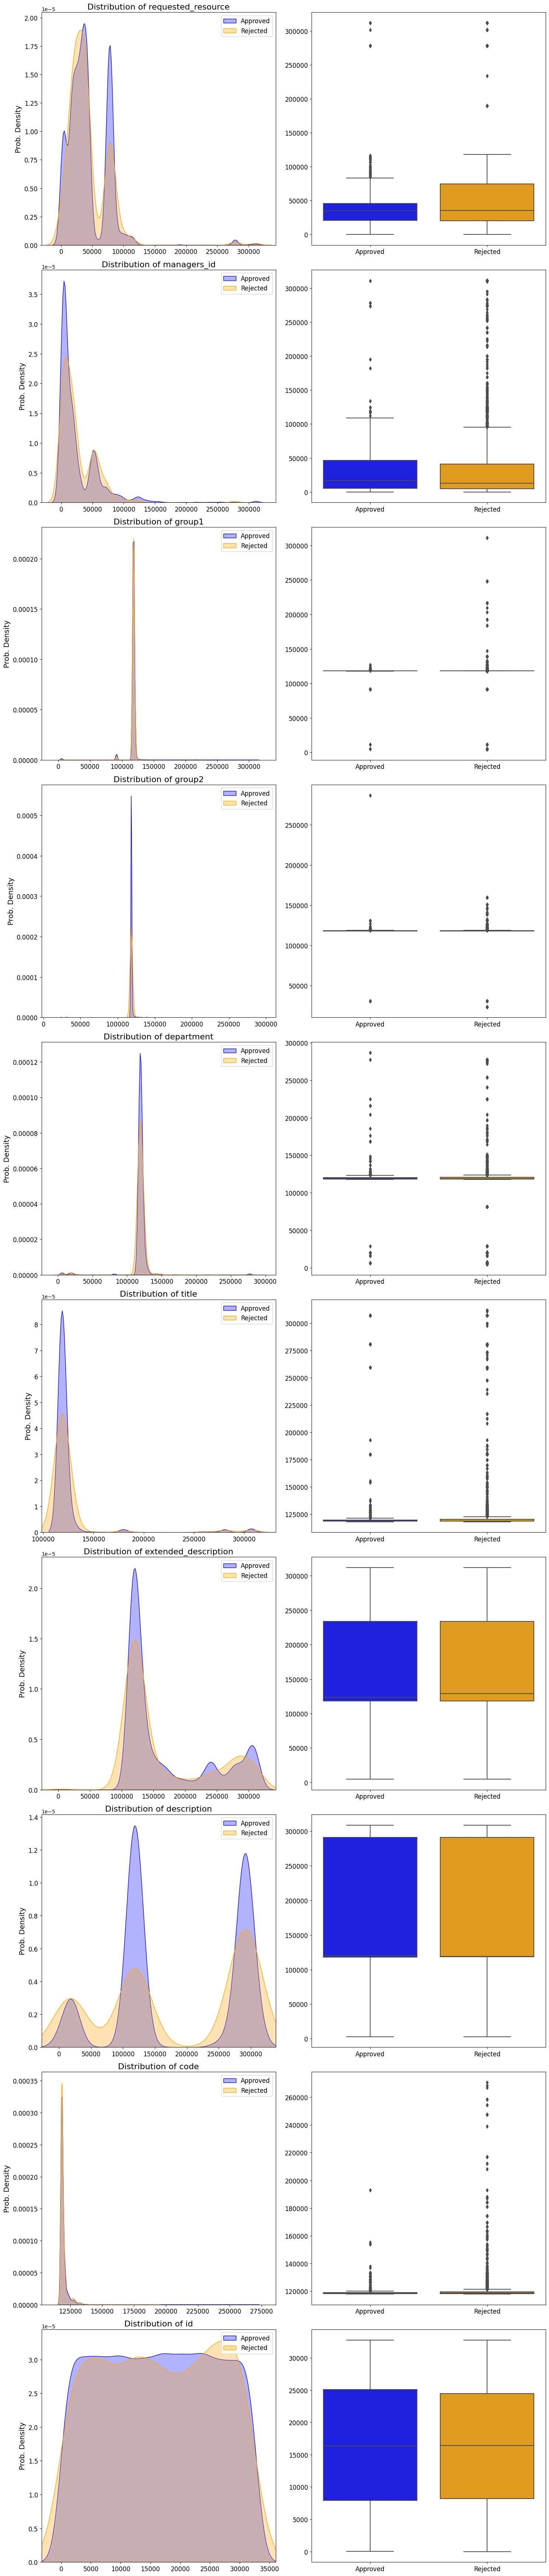

In [72]:
# Get the column names of all features except the target variable 'approval_status'
features = df_train.drop('approval_status', axis=1).columns

# Create a figure with a grid of subplots
fig, axes = plt.subplots(nrows=len(features), ncols=2, figsize=(15, len(features)*7))

# Loop through each feature and create the plots on the corresponding subplots
for i, feature in enumerate(features):
    row = i // 2
    col_num = i % 2
    
    # KDE plot
    sns.kdeplot(data=approved[feature], ax=axes[i, 0], label='Approved', color='blue', fill=True, alpha=0.3)
    sns.kdeplot(data=rejected[feature], ax=axes[i, 0], label='Rejected', color='orange', fill=True, alpha=0.3)
    
    axes[i, 0].set_title('Distribution of {}'.format(feature), size=16)
    axes[i, 0].set_xlabel('')  # Remove x-axis label
    axes[i, 0].set_ylabel('Prob. Density', size=14)
    axes[i, 0].tick_params(labelsize=12)
    axes[i, 0].legend(prop={'size': 12})
    
    # Determine x-axis limits dynamically
    x_min = np.min([approved[feature].min(), rejected[feature].min()])
    x_max = np.max([approved[feature].max(), rejected[feature].max()])
    x_margin = (x_max - x_min) * 0.1  # 10% margin on both sides
    axes[i, 0].set_xlim([x_min - x_margin, x_max + x_margin])
    
    # Box plot
    sns.boxplot(x='approval_status', y=feature, data=df_train, ax=axes[i, 1], palette=['blue', 'orange'])
    
    axes[i, 1].set_xlabel('')
    axes[i, 1].set_ylabel('')
    axes[i, 1].tick_params(labelsize=12)
    axes[i, 1].set_xticklabels(['Approved', 'Rejected'])  # Set x-axis tick labels

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

---
<a name = Section6></a>
# **6. Data Pre-Processing**
---

<a name = Section62></a>
### **6.1 Handling Redundant Data**

In [73]:
# Loop through each column in the training dataframe
for each in df_train.columns:
    # Print the column name and the number of unique values in that column
    print(each, len(df_train[each].unique()))

requested_resource 6469
managers_id 3996
group1 123
group2 168
department 440
title 331
extended_description 2183
description 64
code 331
id 24576
approval_status 2


In [74]:
# Loop through each column in the test dataframe
for each in df_test.columns:
    # Print the column name and the number of unique values in that column
    print(each, len(df_test[each].unique()))

requested_resource 3361
managers_id 2786
group1 116
group2 159
department 403
title 289
extended_description 1408
description 62
code 289
id 8193


### Observation

- Number of unique values in both 'code' and 'title' seems to be the same(331 in train & 289 in test)) 
- Looking at the feature descriptions, ROLE_CODE is a unique code for each role and ROLE_TITLE is a title for each role. 
- So each title might have a unique code and hence there are same number of unique values for 'code' and 'title'

In [75]:
# Drop 'id' and 'title' columns from df_train
df_train.drop(['id', 'code'], axis=1, inplace=True)

# Drop 'id' and 'title' columns from df_test
df_test.drop(['id', 'code'], axis=1, inplace=True)

---
<a name = Section8></a>
# **8. Exploratory Data Analysis**
---

<a name = Section81></a>
### **8.1 How many requests tend to get Approved vs Rejected?**

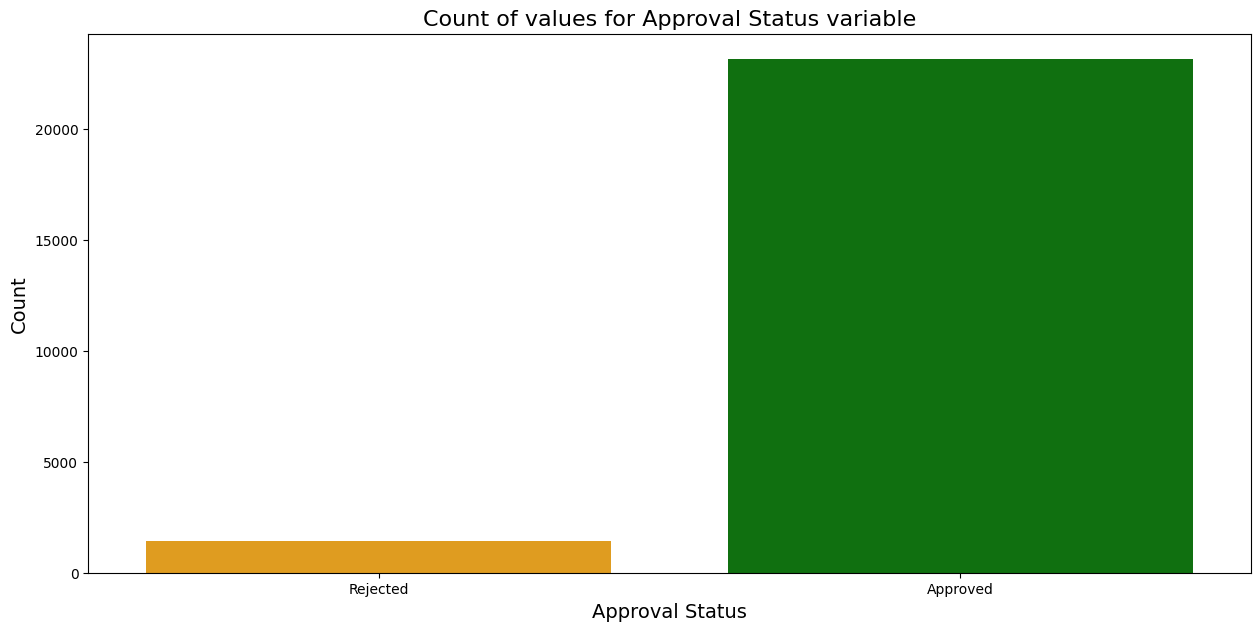

In [76]:
# Create a figure with the specified size
plt.figure(figsize=(15, 7))

# Plot the count of values for 'approval_status' with corrected labels and colors
sns.countplot(x='approval_status', data=df_train, palette=['orange', 'green'])

# Set the title and labels
plt.title('Count of values for Approval Status variable', size=16)
plt.xlabel('Approval Status', size=14)
plt.ylabel('Count', size=14)

# Set the x-axis tick labels
plt.xticks([0, 1], ['Rejected', 'Approved'])

# Display the plot
plt.show()

<a name = Section82></a>
### **8.2 Which Resource tends to get Accepted or Rejected more??**

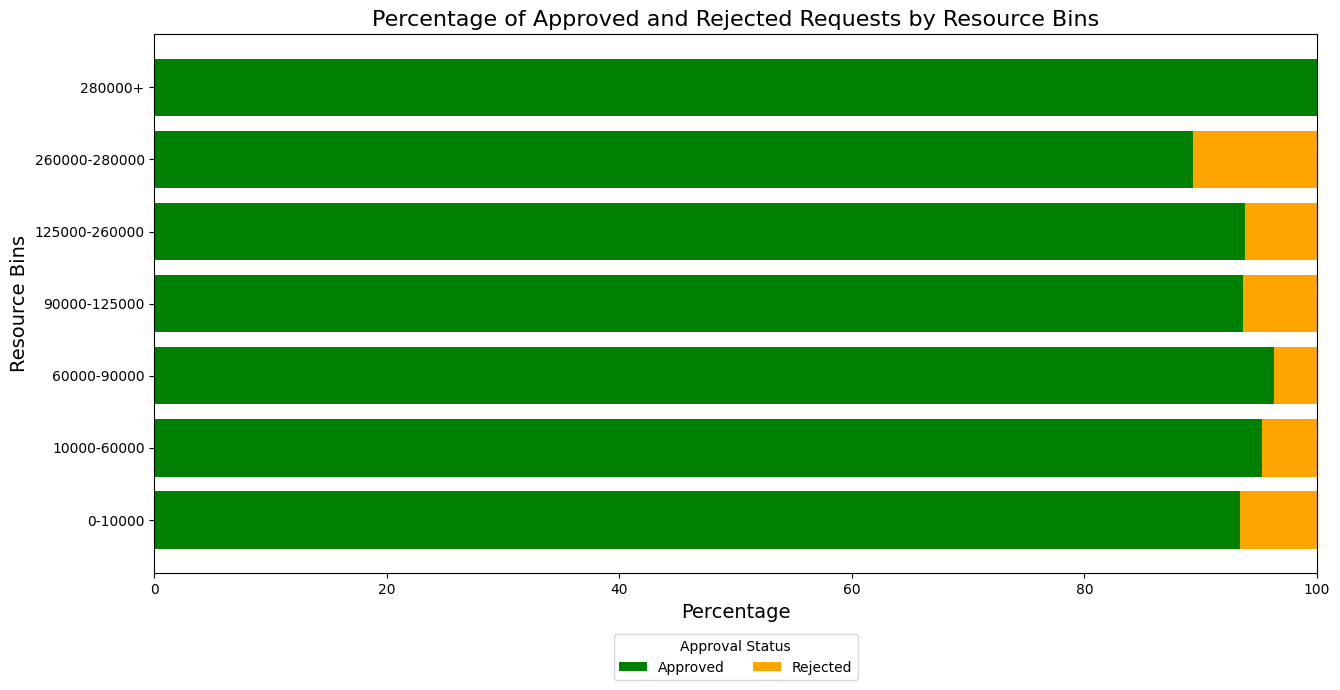

In [78]:
# Group the 'requested_resource' into specified bins and create a new column 'resource_bin'
bins = [0, 10000, 60000, 90000, 125000, 260000, 280000, float('inf')]
labels = ['0-10000', '10000-60000', '60000-90000', '90000-125000', '125000-260000', '260000-280000', '280000+']
df_train['resource_bin'] = pd.cut(df_train['requested_resource'], bins=bins, labels=labels, right=False)

# Convert 'resource_bin' to a categorical type
df_train['resource_bin'] = pd.Categorical(df_train['resource_bin'], categories=labels, ordered=True)

# Calculate the total count for each resource bin
total_counts = df_train['resource_bin'].value_counts()

# Calculate the percentage of approved requests for each resource bin
approved_percentages = df_train[df_train['approval_status'] == 1]['resource_bin'].value_counts() / total_counts * 100

# Calculate the percentage of rejected requests for each resource bin
rejected_percentages = df_train[df_train['approval_status'] == 0]['resource_bin'].value_counts() / total_counts * 100

# Create a figure with the desired size
plt.figure(figsize=(15, 7))

# Set the positions of the bars on the y-axis
y = np.arange(len(labels))

# Plot the bars for approved requests
plt.barh(y, approved_percentages, label='Approved', color='green')

# Plot the bars for rejected requests, stacked on the right side of the approved bars
plt.barh(y, rejected_percentages, left=approved_percentages, label='Rejected', color='orange')

# Set the title and labels
plt.title('Percentage of Approved and Rejected Requests by Resource Bins', size=16)
plt.xlabel('Percentage', size=14)
plt.ylabel('Resource Bins', size=14)

# Set the y-axis tick labels
plt.yticks(y, labels)

# Move the legend below the plot using bbox_to_anchor
plt.legend(title='Approval Status', loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)

# Display the plot
plt.show()

<a name = Section83></a>
### **8.3 Under what Managers, do the resources tend to get Approved/Rejected more ?**

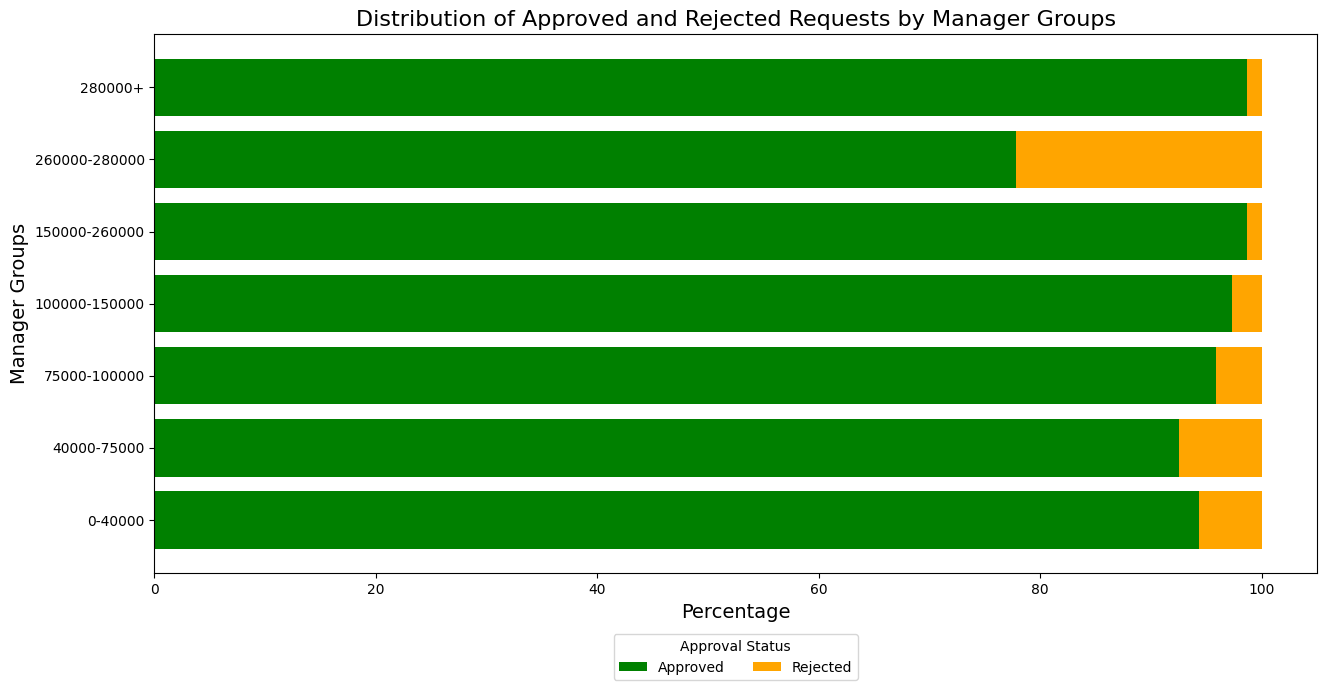

In [80]:
manager_bins = [0, 40000, 75000, 100000, 150000, 260000, 280000, float('inf')]
manager_labels = ['0-40000', '40000-75000', '75000-100000', '100000-150000', '150000-260000', '260000-280000', '280000+']
df_train['manager_group'] = pd.cut(df_train['managers_id'], bins=manager_bins, labels=manager_labels, right=False)

# Calculate the count of approved and rejected requests for each manager group
manager_counts = df_train.groupby(['manager_group', 'approval_status']).size().unstack(fill_value=0)

# Calculate the total count for each manager group
total_counts = manager_counts.sum(axis=1)

# Calculate the percentage of approved requests for each manager group
approved_percentages = manager_counts[1] / total_counts * 100

# Calculate the percentage of rejected requests for each manager group
rejected_percentages = manager_counts[0] / total_counts * 100

# Create a figure with the desired size
plt.figure(figsize=(15, 7))

# Set the positions of the bars on the y-axis
y = np.arange(len(manager_labels))

# Plot the bars for approved requests
plt.barh(y, approved_percentages, label='Approved', color='green')

# Plot the bars for rejected requests, stacked on the right side of the approved bars
plt.barh(y, rejected_percentages, left=approved_percentages, label='Rejected', color='orange')

# Set the title and labels
plt.title('Distribution of Approved and Rejected Requests by Manager Groups', size=16)
plt.xlabel('Percentage', size=14)
plt.ylabel('Manager Groups', size=14)

# Set the y-axis tick labels
plt.yticks(y, manager_labels)

# Move the legend below the plot using bbox_to_anchor
plt.legend(title='Approval Status', loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)

# Display the plot
plt.show()

<a name = Section85></a>
### **8.4 How does the Company role group ID 2 affect the Approval/Rejection?**

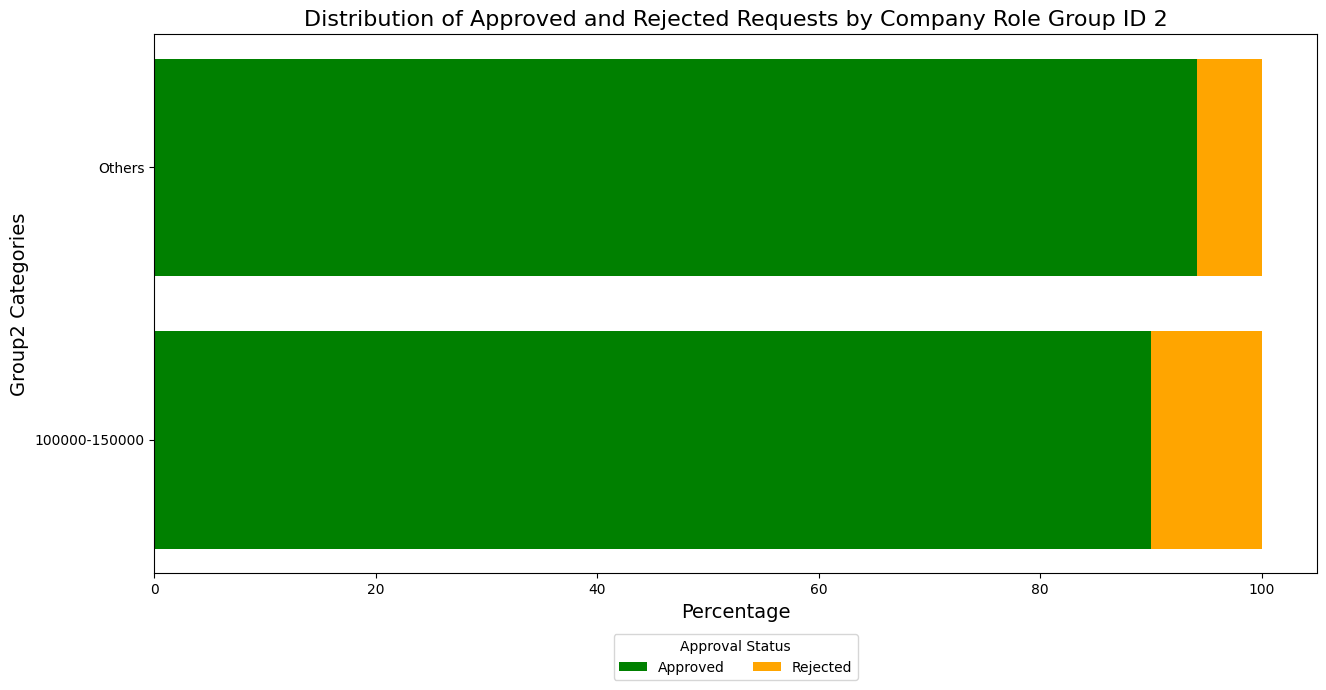

In [81]:
# Group the 'group2' column into specified bins and create a new column 'group2_category'
group2_bins = [0, 100000, float('inf')]
group2_labels = ['100000-150000', 'Others']
df_train['group2_category'] = pd.cut(df_train['group2'], bins=group2_bins, labels=group2_labels, right=False)

# Calculate the count of approved and rejected requests for each group2 category
group2_counts = df_train.groupby(['group2_category', 'approval_status']).size().unstack(fill_value=0)

# Calculate the total count for each group2 category
total_counts = group2_counts.sum(axis=1)

# Calculate the percentage of approved requests for each group2 category
approved_percentages = group2_counts[1] / total_counts * 100

# Calculate the percentage of rejected requests for each group2 category
rejected_percentages = group2_counts[0] / total_counts * 100

# Create a figure with the desired size
plt.figure(figsize=(15, 7))

# Set the positions of the bars on the y-axis
y = np.arange(len(group2_labels))

# Plot the bars for approved requests
plt.barh(y, approved_percentages, label='Approved', color='green')

# Plot the bars for rejected requests, stacked on the right side of the approved bars
plt.barh(y, rejected_percentages, left=approved_percentages, label='Rejected', color='orange')

# Set the title and labels
plt.title('Distribution of Approved and Rejected Requests by Company Role Group ID 2', size=16)
plt.xlabel('Percentage', size=14)
plt.ylabel('Group2 Categories', size=14)

# Set the y-axis tick labels
plt.yticks(y, group2_labels)

# Move the legend below the plot using bbox_to_anchor
plt.legend(title='Approval Status', loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)

# Display the plot
plt.show()

<a name = Section86></a>
### **8.5 How does the Department affect Approval/Rejection of resources?**

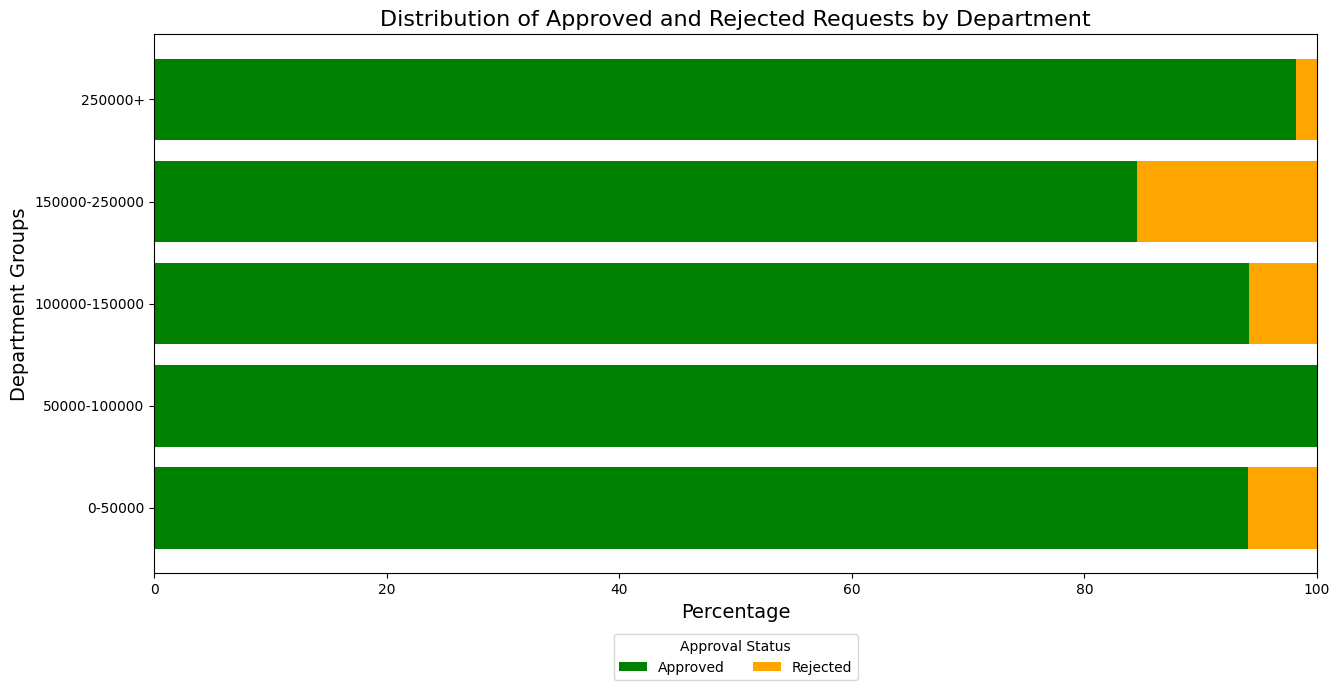

In [82]:
# Group the 'department' column into specified bins and create a new column 'department_group'
department_bins = [0, 50000, 100000, 150000, 250000, float('inf')]
department_labels = ['0-50000', '50000-100000', '100000-150000', '150000-250000', '250000+']
df_train['department_group'] = pd.cut(df_train['department'], bins=department_bins, labels=department_labels, right=False)

# Calculate the count of approved and rejected requests for each department group
department_counts = df_train.groupby(['department_group', 'approval_status']).size().unstack(fill_value=0)

# Calculate the total count for each department group
total_counts = department_counts.sum(axis=1)

# Calculate the percentage of approved requests for each department group
approved_percentages = department_counts[1] / total_counts * 100

# Calculate the percentage of rejected requests for each department group
rejected_percentages = department_counts[0] / total_counts * 100

# Create a figure with the desired size
plt.figure(figsize=(15, 7))

# Set the positions of the bars on the y-axis
y = np.arange(len(department_labels))

# Plot the bars for approved requests
plt.barh(y, approved_percentages, label='Approved', color='green')

# Plot the bars for rejected requests, stacked on the right side of the approved bars
plt.barh(y, rejected_percentages, left=approved_percentages, label='Rejected', color='orange')

# Set the title and labels
plt.title('Distribution of Approved and Rejected Requests by Department', size=16)
plt.xlabel('Percentage', size=14)
plt.ylabel('Department Groups', size=14)

# Set the y-axis tick labels
plt.yticks(y, department_labels)

# Move the legend below the plot using bbox_to_anchor
plt.legend(title='Approval Status', loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)

# Display the plot
plt.show()

<a name = Section87></a>
### **8.6 Effect of Extended Company role Extended Description to the Approval Status?**

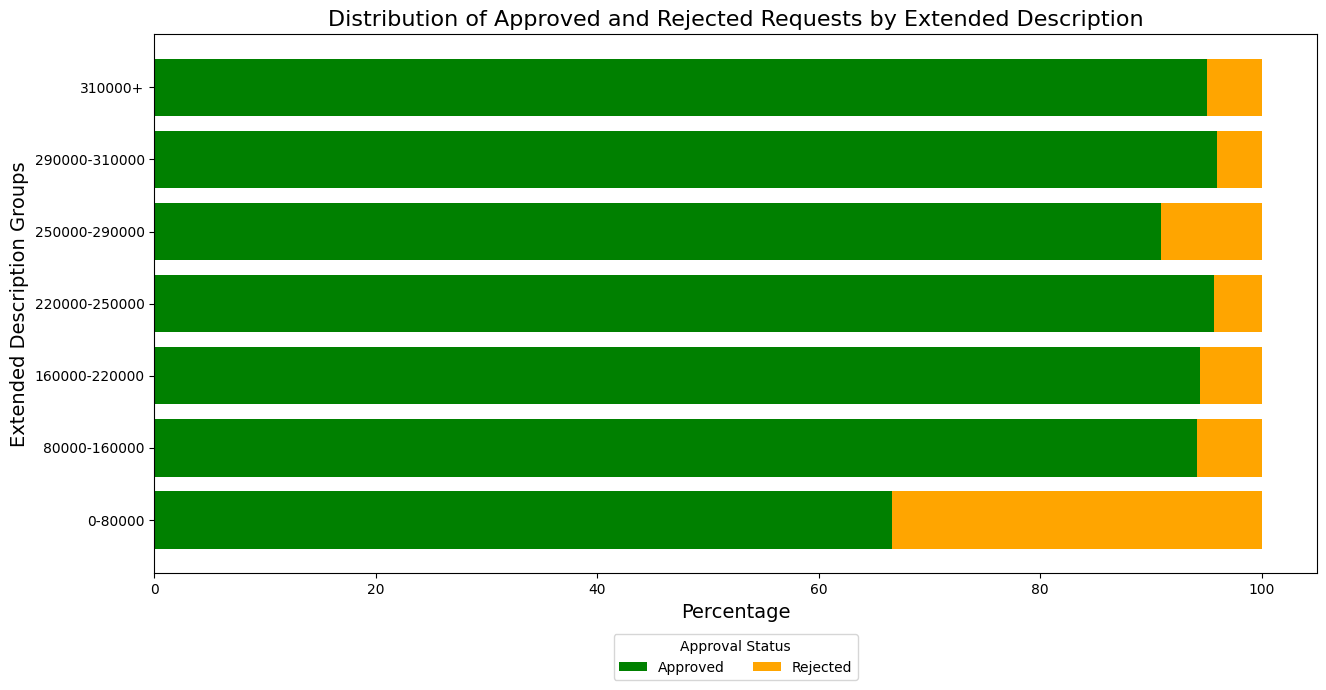

In [83]:
# Group the 'extended_description' column into specified bins and create a new column 'description_group'
description_bins = [0, 80000, 160000, 220000, 250000, 290000, 310000, float('inf')]
description_labels = ['0-80000', '80000-160000', '160000-220000', '220000-250000', '250000-290000', '290000-310000', '310000+']
df_train['description_group'] = pd.cut(df_train['extended_description'], bins=description_bins, labels=description_labels, right=False)

# Calculate the count of approved and rejected requests for each description group
description_counts = df_train.groupby(['description_group', 'approval_status']).size().unstack(fill_value=0)

# Calculate the total count for each description group
total_counts = description_counts.sum(axis=1)

# Calculate the percentage of approved requests for each description group
approved_percentages = description_counts[1] / total_counts * 100

# Calculate the percentage of rejected requests for each description group
rejected_percentages = description_counts[0] / total_counts * 100

# Create a figure with the desired size
plt.figure(figsize=(15, 7))

# Set the positions of the bars on the y-axis
y = np.arange(len(description_labels))

# Plot the bars for approved requests
plt.barh(y, approved_percentages, label='Approved', color='green')

# Plot the bars for rejected requests, stacked on the right side of the approved bars
plt.barh(y, rejected_percentages, left=approved_percentages, label='Rejected', color='orange')

# Set the title and labels
plt.title('Distribution of Approved and Rejected Requests by Extended Description', size=16)
plt.xlabel('Percentage', size=14)
plt.ylabel('Extended Description Groups', size=14)

# Set the y-axis tick labels
plt.yticks(y, description_labels)

# Move the legend below the plot using bbox_to_anchor
plt.legend(title='Approval Status', loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)

# Display the plot
plt.show()

<a name = Section88></a>
### **8.7 Effect of Extended Company role Description to the Approval Status??**

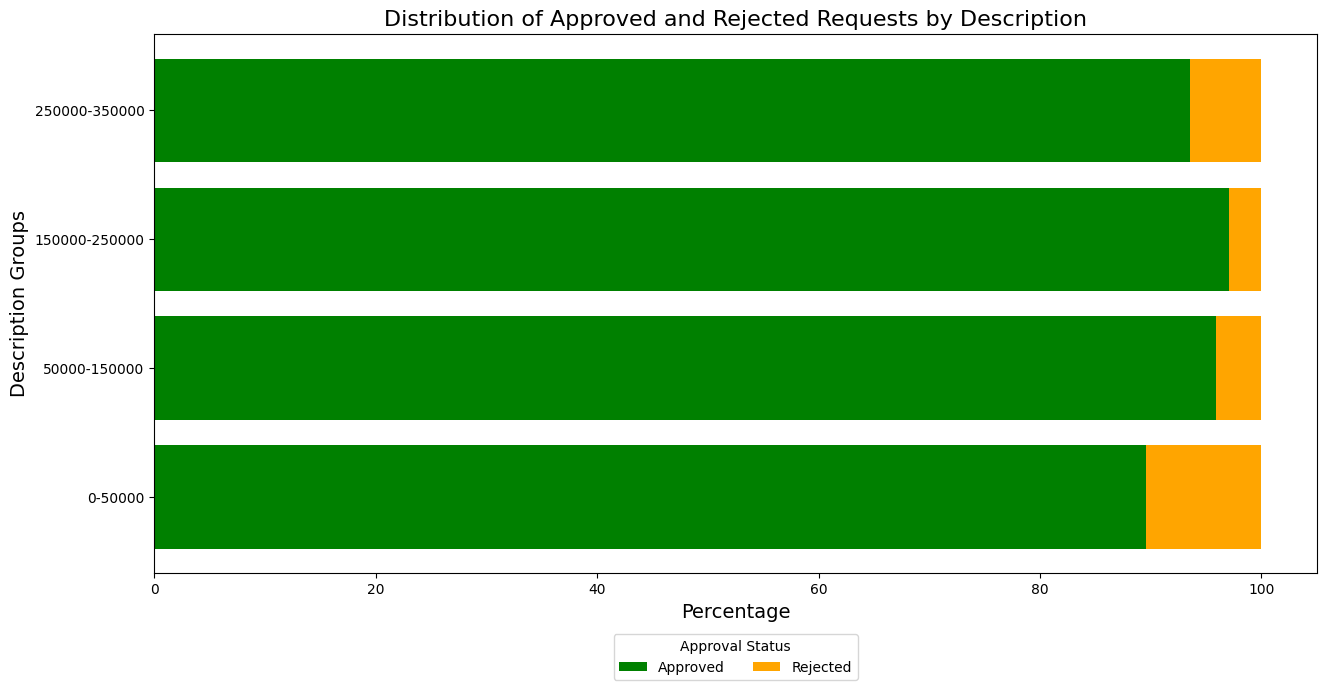

In [84]:
# Group the 'description' column into specified bins and create a new column 'description_group'
description_bins = [0, 50000, 150000, 250000, 350000]
description_labels = ['0-50000', '50000-150000', '150000-250000', '250000-350000']
df_train['description_group'] = pd.cut(df_train['description'], bins=description_bins, labels=description_labels, right=False)

# Calculate the count of approved and rejected requests for each description group
description_counts = df_train.groupby(['description_group', 'approval_status']).size().unstack(fill_value=0)

# Calculate the total count for each description group
total_counts = description_counts.sum(axis=1)

# Calculate the percentage of approved requests for each description group
approved_percentages = description_counts[1] / total_counts * 100

# Calculate the percentage of rejected requests for each description group
rejected_percentages = description_counts[0] / total_counts * 100

# Create a figure with the desired size
plt.figure(figsize=(15, 7))

# Set the positions of the bars on the y-axis
y = np.arange(len(description_labels))

# Plot the bars for approved requests
plt.barh(y, approved_percentages, label='Approved', color='green')

# Plot the bars for rejected requests, stacked on the right side of the approved bars
plt.barh(y, rejected_percentages, left=approved_percentages, label='Rejected', color='orange')

# Set the title and labels
plt.title('Distribution of Approved and Rejected Requests by Description', size=16)
plt.xlabel('Percentage', size=14)
plt.ylabel('Description Groups', size=14)

# Set the y-axis tick labels
plt.yticks(y, description_labels)

# Move the legend below the plot using bbox_to_anchor
plt.legend(title='Approval Status', loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)

# Display the plot
plt.show()

<a name = Section89></a>
### **8.8 How does the role Title affect the Approval or rejection of resources in General?**

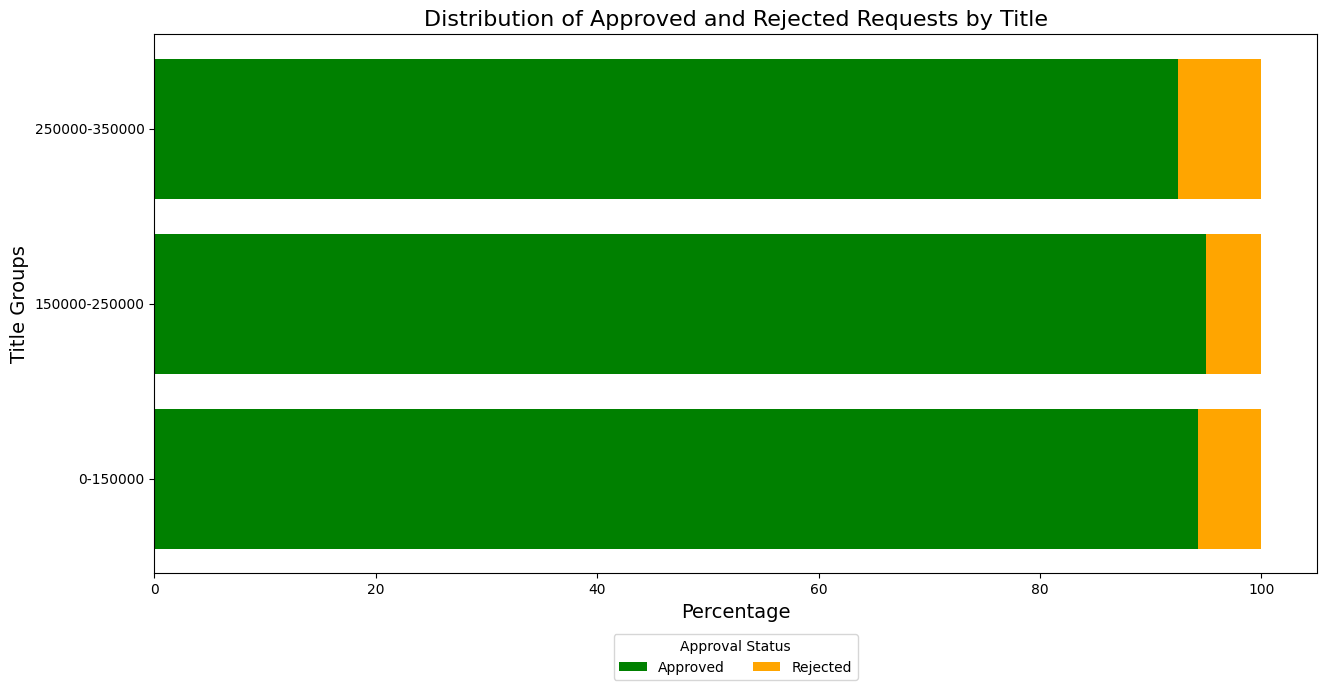

In [86]:
# Group the 'title' column into specified bins and create a new column 'title_group'
title_bins = [0, 150000, 250000, 350000]
title_labels = ['0-150000', '150000-250000', '250000-350000']
df_train['title_group'] = pd.cut(df_train['title'], bins=title_bins, labels=title_labels, right=False)

# Calculate the count of approved and rejected requests for each title group
title_counts = df_train.groupby(['title_group', 'approval_status']).size().unstack(fill_value=0)

# Calculate the total count for each title group
total_counts = title_counts.sum(axis=1)

# Calculate the percentage of approved requests for each title group
approved_percentages = title_counts[1] / total_counts * 100

# Calculate the percentage of rejected requests for each title group
rejected_percentages = title_counts[0] / total_counts * 100

# Create a figure with the desired size
plt.figure(figsize=(15, 7))

# Set the positions of the bars on the y-axis
y = np.arange(len(title_labels))

# Plot the bars for approved requests
plt.barh(y, approved_percentages, label='Approved', color='green')

# Plot the bars for rejected requests, stacked on the right side of the approved bars
plt.barh(y, rejected_percentages, left=approved_percentages, label='Rejected', color='orange')

# Set the title and labels
plt.title('Distribution of Approved and Rejected Requests by Title', size=16)
plt.xlabel('Percentage', size=14)
plt.ylabel('Title Groups', size=14)

# Set the y-axis tick labels
plt.yticks(y, title_labels)

# Move the legend below the plot using bbox_to_anchor
plt.legend(title='Approval Status', loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)

# Display the plot
plt.show()

---
<a name = Section7></a>
# **7. Data Post-Profiling**
---

- Getting a report about the data after the data manipulation.


In [ ]:
# Profile Report of Cleaned Dataset

profile = ProfileReport(df=df_train) 
print('\n' + '-'*40 + '\n')
print('E Corp Post-profile Report Generated')

In [ ]:
# Loading profile report to file for record keeping

profile.to_file("Ecorp_postprofile_report.html")

---
<a name = Section9></a>
# **9. Feature Selection and PCA**
---

In [56]:
# Split the data into X (features) and y (target variable)
X = df_train.drop(['id','approval_status'], axis=1)
y = df_train['approval_status']

<a name = Section91></a>
### **9.1 Feature Selection with Correlation Matrix**

In [57]:
# Create a correlation matrix between all features and net_worth
corr_matrix = X.corrwith(y)

# Split the correlations into two lists based on positive or negative correlation
neg_corr = corr_matrix[corr_matrix > 0].sort_values(ascending=False)
pos_corr = corr_matrix[corr_matrix < 0].sort_values()

# Multiply the correlations by 100 to express them as percentages
neg_corr = neg_corr * 100
pos_corr = pos_corr * -100

# Print the results
print("Sorted list of Negatively correlated features with net worth (in percentage):\n")
print(neg_corr)
print("\nSorted List of Positively correlated features with net worth (in percentage):\n")
print(pos_corr)

Sorted list of Negatively correlated features with net worth (in percentage):

code                   1.55
extended_description   0.93
requested_resource     0.47
department             0.34
description            0.33
group2                 0.30
dtype: float64

Sorted List of Positively correlated features with net worth (in percentage):

group1        1.05
title         1.00
managers_id   0.55
dtype: float64


In [ ]:
# Set the threshold for dropping columns
threshold = 7.5

# Identify the columns below the threshold and drop them
columns_to_drop = neg_corr[neg_corr < threshold].index.tolist() + pos_corr[pos_corr < threshold].index.tolist()

# Drop the columns only if they exist in the dataset
X = X.drop(columns=columns_to_drop)
df_test = df_test.drop(columns=columns_to_drop, errors='ignore')

# Print the updated dataset
X.head()

In [ ]:
# Updating the pos_corr list to exclude features not present in X
pos_corr = pos_corr[pos_corr.index.isin(X.columns)]

# Set figure size
plt.figure(figsize=(15, 15))

# Plot heatmap of positively correlated features with net worth
sns.heatmap(X[pos_corr.index].corr(), annot=True, cmap='viridis', annot_kws={'fontsize': 12})
plt.title('Features significantly affecting Net worth Status', fontsize=16, pad=20)

# Adjust the plot layout
plt.tight_layout()
plt.show()

<a name = Section92></a>
### **9.2 Encoding Categorical Variables**

In [ ]:
# Extract categorical columns for encoding
categorical_cols = X.select_dtypes('object').columns

# Initialize label encoder
label_encoder = LabelEncoder()

# Perform label encoding for age_band column
age_band_mapping = {'18-21': 1, '22-25': 2, '26-30': 3, '31-35': 4, '36-40': 5, '41-45': 6, '45-50': 7,
                    '51-55': 8, '55-60': 9, '61-65': 10, '65-70': 11, '71+': 12, 'Unknown': 0}

X['age_band'] = label_encoder.fit_transform(X['age_band'].map(age_band_mapping))
df_test['age_band'] = label_encoder.transform(df_test['age_band'].map(age_band_mapping))

# Perform label encoding for family_income column
family_income_mapping = {'< 4,000': 1, '< 8,000, >= 4,000': 2, '<10,000, >= 8,000': 3,
                         '<12,500, >=10,000': 4, '<15,000, >=12,500': 5, '<17,500, >=15,000': 6,
                         '<20,000, >=17,500': 7, '<22,500, >=20,000': 8, '<25,000, >=22,500': 9,
                         '<27,500, >=25,000': 10, '<30,000, >=27,500': 11, '>=35,000': 12, 'Unknown': 0}

X['family_income'] = label_encoder.fit_transform(X['family_income'].map(family_income_mapping))
df_test['family_income'] = label_encoder.transform(df_test['family_income'].map(family_income_mapping))

# Perform one-hot encoding for remaining categorical columns
categorical_cols = categorical_cols.drop(['age_band', 'family_income'])  # Remove label encoded columns

onehot_encoder = OneHotEncoder(sparse=False, drop='first')

X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)
df_test = pd.get_dummies(df_test, columns=categorical_cols, drop_first=True)

# Ensure consistency in one-hot encoding columns between train and test datasets
train_columns = set(X.columns)
test_columns = set(df_test.columns)

# Find columns present in train but not in test
extra_train_columns = train_columns - test_columns

# Add the missing columns to test dataset with values set to 0
for column in extra_train_columns:
    df_test[column] = 0

# Reorder the columns in test dataset to match the order in train dataset
df_test = df_test[X.columns]

<a name = Section94></a>
### **9.3  Balancing Dataset with SMOTE**

In [ ]:
# Perform oversampling using SMOTE
smote = SMOTE()
X, y = smote.fit_resample(X, y)

<a name = Section94></a>
### **9.4 Feature Scaling**

In [ ]:
# Create a scaler object
scaler = StandardScaler()

# Extract numerical columns for scaling
numerical_cols = X.select_dtypes(['int', 'float']).columns

# Scale the numerical columns in the training data
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Scale the numerical columns in the test data
df_test[numerical_cols] = scaler.transform(df_test[numerical_cols])

In [59]:
df_test = df_test.drop('id', axis=1)

In [60]:
print('Training Data Shape:',X.shape)
print('Test Data Shape:',df_test.shape)

Training Data Shape: (24576, 9)
Test Data Shape: (8193, 9)


---
<a name = Section10></a>
# **10. Model Development & Evaluation**
---

In [61]:
# Split the data into training and development sets
x_train, x_dev, y_train, y_dev = train_test_split(X, y, test_size=0.2, random_state=77, stratify=y)

In [62]:
# Initialize classifiers
log_clf = LogisticRegression(random_state = 77, class_weight='balanced')
sv_clf = SVC(random_state=77, class_weight='balanced', probability=True)
dt_clf = DecisionTreeClassifier(random_state = 77, class_weight='balanced')
rf_clf = RandomForestClassifier(n_estimators=500, random_state = 77, class_weight='balanced', n_jobs=-1)
gb_clf = GradientBoostingClassifier(n_estimators=500, random_state = 77)
nb_clf = GaussianNB()

In [66]:
# Initialize a list of classifier objects
clf_list = [log_clf, sv_clf, dt_clf, rf_clf, gb_clf, nb_clf]

# Create empty lists to store accuracy scores and classifier names
train_accuracy_scores = []
dev_accuracy_scores = []
clf_names = []

# Train classifiers over the train data and calculate accuracy scores
for clf in clf_list:
    # Fit the train data to the classifier object
    clf.fit(x_train, y_train)
  
    # Predict the train and dev labels
    train_preds = clf.predict(x_train)
    dev_preds = clf.predict(x_dev)

    # Calculate the train and dev accuracy scores
    train_accuracy = accuracy_score(y_train, train_preds)
    dev_accuracy = accuracy_score(y_dev, dev_preds)
    
    # Append train and dev accuracy scores to the lists
    train_accuracy_scores.append(np.round(a=train_accuracy, decimals=4))
    dev_accuracy_scores.append(np.round(a=dev_accuracy, decimals=4))
    clf_names.append(clf.__class__.__name__)


In [67]:
# Create an accuracy score dataframe from the scores and names list
accuracy_score_frame = pd.DataFrame(data={'Training Set Accuracy': train_accuracy_scores, 'Dev Set Accuracy': dev_accuracy_scores}, index=clf_names)

# View the accuracy scores of all the classifiers
accuracy_score_frame.transpose()

,LogisticRegression,SVC,DecisionTreeClassifier,RandomForestClassifier,GradientBoostingClassifier,GaussianNB
Training Set Accuracy,0.50,0.58,1.00,1.00,0.95,0.92
Dev Set Accuracy,0.50,0.58,0.92,0.95,0.94,0.91


---
<a name = Section11></a>
# **11. Submission**
---

In [69]:
# Find the index of the classifier with the highest dev accuracy score
best_index = np.argmax(dev_accuracy_scores)
best_classifier_name = clf_names[best_index]

# Use the best classifier to predict on df_test
best_classifier = clf_list[best_index]
test_predictions = best_classifier.predict(df_test)

# Create a new dataframe with only the 'ID' column from df_test_og for submission
submission_df = df_test_og[['ID']].copy()

# Add the predicted labels column to the submission dataframe
submission_df['predicted_Approval_Grid'] = test_predictions

# Save the submission dataframe to a CSV file without index and header
submission_df.to_csv('submission.csv', index=False, header=False)

<center>
  <a href="https://thedatascienceguy.go.studio/">
    <img src="https://raw.githubusercontent.com/Mihir-Ai-lab/The_Data_Science_Guy/main/Images/Notebook%20Footer.png" width="1200" height="627" />
  </a>
</center>